# Case Study -1 :

##      Smart Home Dataset with Weather Information

## 1. Business/Real-world Problem

### 1.1 What is Smart home? 

<p>
A smart home refers to a convenient home setup where appliances and devices can be automatically controlled remotely from anywhere with an internet connection using a mobile or other networked device. Devices in a smart home are interconnected through the internet, allowing the user to control functions such as security access to the home, temperature, lighting, and a home theater remotely
<p>

### 1.2. Problem Statement


<p>This problem is about how weather changes the usages of the appliances and their power consumption in home.

### 1.3 Source/Useful Links 

<p> This data set contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region and in total it contains 32 columns of smart meter data of various appliances with 503910 observations.
    
<b> Source: </b> https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information
</p>
    

##  1 . Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.ensemble import IsolationForest
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose


In [7]:
!unzip "/content/drive/MyDrive/HomeCs.zip" -d "/content/drive/MyDrive/"

Archive:  /content/drive/MyDrive/HomeCs.zip
replace /content/drive/MyDrive/HomeCs.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/HomeCs.csv  


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Data Preprocessing 

In [2]:
data_df = pd.read_csv('HomeCs.csv')

C:\Users\k64093431\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
shape=data_df.shape
print(" Number of rows in the dataset : {} and Number of columns {}".format(shape[0],shape[1]))

 Number of rows in the dataset : 503911 and Number of columns 32


### Observation

* The Total dataset consists of 503911 rows and 32 columns.

In [4]:
data_df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

### Summary

* The Total dataset consists of 503911 unique rows and 32 columns where each column represent various data about the home and its outside environment factors such as Temperture , humidity , Energy consumed by each applainces etc. .
* We have used for this project is titled “Smart Home Dataset with Weather Information'', which has been downloaded from Kaggle. The readings with the time-span of 1 minute of the energy used (in kW) by the appliances of a smart home, and the weather conditions of that area at that time. 

### 2.1 Check for NAN values in the data and revome those values 

In [5]:
data_df.head(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [6]:
data_df.tail(5)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
NAN_value= data_df.isnull().sum().sum()
print(" There are {} NAN values in this dataframe".format(NAN_value))

 There are 31 NAN values in this dataframe


In [8]:
#Removing the last row as it is invalid
data_df = data_df[0:-1]
NAN_value= data_df.isnull().sum().sum()
print(" There are {} NAN values in this dataframe".format(NAN_value))

 There are 0 NAN values in this dataframe


In [9]:
print("After removing the Last row from the dataset which contains NAN values")
data_df.tail(5)


After removing the Last row from the dataset which contains NAN values


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [10]:
shape=data_df.shape
print(" Number of rows in the dataset : {} and Number of columns {}".format(shape[0],shape[1]))

 Number of rows in the dataset : 503910 and Number of columns 32


## Observation 

* As we see there are 31 NAN values in the dataset and they are at the last row . So we can remove those values because it won't affect the temporal nature of our data because these are at the last row so now the number of rows is reduced to 503910.

In [11]:
#Removing [kW] from column names
data_df.columns = [col.replace(' [kW]', '') for col in data_df.columns]
data_df.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [12]:
data_df.head(5)

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [13]:
#Summing the columns 'Furnace 1' and 'Furnace 2' since we only need the total energy usage by both the furnaces
data_df['Furnace'] = data_df[['Furnace 1','Furnace 2']].sum(axis=1)

#Finding the average usage of all kitchens('Kitchen 12','Kitchen 14','Kitchen 38')
data_df['Kitchen'] = data_df[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)


#Dropping old columns on which the aggregation have been done
data_df = data_df.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)

In [14]:
#Converting the unix timestamp values in the column 'time' to a readable date format
#Setting freq= 'min' since readings are being taken in a time span of one min
time_index = pd.date_range('2016-01-01 05:00', periods=len(data_df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
data_df = data_df.set_index(time_index)
data_df = data_df.drop(['time'], axis=1)
data_df.iloc[np.r_[0:5,-5:0]].iloc[:,0]

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

In [15]:
#Display dataframe info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   House overall        503910 non-null  float64
 3   Dishwasher           503910 non-null  float64
 4   Home office          503910 non-null  float64
 5   Fridge               503910 non-null  float64
 6   Wine cellar          503910 non-null  float64
 7   Garage door          503910 non-null  float64
 8   Barn                 503910 non-null  float64
 9   Well                 503910 non-null  float64
 10  Microwave            503910 non-null  float64
 11  Living room          503910 non-null  float64
 12  Solar                503910 non-null  float64
 13  temperature          503910 non-null  float64
 14  icon                 50391

In [16]:

print(data_df[['icon','cloudCover','summary']].head(3))
print("\n These features icon , Cloudcover and summary contains categorical values we need to come with any approch to convert it into Integer to make use of this data")

                            icon  cloudCover summary
2016-01-01 05:00:00  clear-night  cloudCover   Clear
2016-01-01 05:01:00  clear-night  cloudCover   Clear
2016-01-01 05:02:00  clear-night  cloudCover   Clear

 These features icon , Cloudcover and summary contains categorical values we need to come with any approch to convert it into Integer to make use of this data


In [17]:
#Find the unique values in Summary
print("Number of unique categories in summary is ",len(data_df.summary.unique()))
data_df.summary.unique()

Number of unique categories in summary is  18


array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [18]:
#Find the unique values in Icon

print("Number of unique categories in icon is ",len(data_df.icon.unique()))
data_df.icon.unique()

Number of unique categories in icon is  9


array(['clear-night', 'partly-cloudy-night', 'clear-day', 'cloudy',
       'partly-cloudy-day', 'rain', 'snow', 'wind', 'fog'], dtype=object)

In [19]:
#Find the unique values in CloudCover

print("Number of unique categories in cloudCover is ",len(data_df.cloudCover.unique()))
data_df.cloudCover.unique()

Number of unique categories in cloudCover is  118


array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

As there are many methods for Replacing categorical values like

1. Label encoding
2. One-Hot encoding
3. Binary encoding
4. Backward difference encoding

We will use label encoding for summary and icon as these colums represents unique category it does not contains any ordinal in nature so we will use label encoding technique to convert this to numerical and use for further processing



In [20]:
#Covert the Summary and icon into label encoding values to see these feature helps
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_df['summary_cat'] = labelencoder.fit_transform(data_df['summary'])
data_df['icon_cat'] = labelencoder.fit_transform(data_df['icon'])

In [21]:
#Drop columns 'icon' and 'summary' as their data type is 'object'
data_df = data_df.drop(['icon', 'summary'], axis=1)

In [22]:
data_df['cloudCover'].head(5)

2016-01-01 05:00:00    cloudCover
2016-01-01 05:01:00    cloudCover
2016-01-01 05:02:00    cloudCover
2016-01-01 05:03:00    cloudCover
2016-01-01 05:04:00    cloudCover
Freq: T, Name: cloudCover, dtype: object

In [23]:
#We replace these missing values with the next valid observation we have
data_df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data_df['cloudCover'] = data_df['cloudCover'].astype('float')

As we see there are some values in Cloudcover feautues are strings and other are integer we need to convert all the values to integer .So that we are going to replace the string "CloudCover" with the next valid observation.

In [24]:
data_df[['summary_cat','icon_cat','cloudCover']].head(5)

,summary_cat,icon_cat,cloudCover
2016-01-01 05:00:00,3,1,0.75
2016-01-01 05:01:00,3,1,0.75
2016-01-01 05:02:00,3,1,0.75
2016-01-01 05:03:00,3,1,0.75
2016-01-01 05:04:00,3,1,0.75


In [25]:
#It seems some of the columns  show the same data
data_df[['use', 'House overall','Solar','gen']].head()

,use,House overall,Solar,gen
2016-01-01 05:00:00,0.932833,0.932833,0.003483,0.003483
2016-01-01 05:01:00,0.934333,0.934333,0.003467,0.003467
2016-01-01 05:02:00,0.931817,0.931817,0.003467,0.003467
2016-01-01 05:03:00,1.022050,1.022050,0.003483,0.003483
2016-01-01 05:04:00,1.139400,1.139400,0.003467,0.003467


<AxesSubplot:>

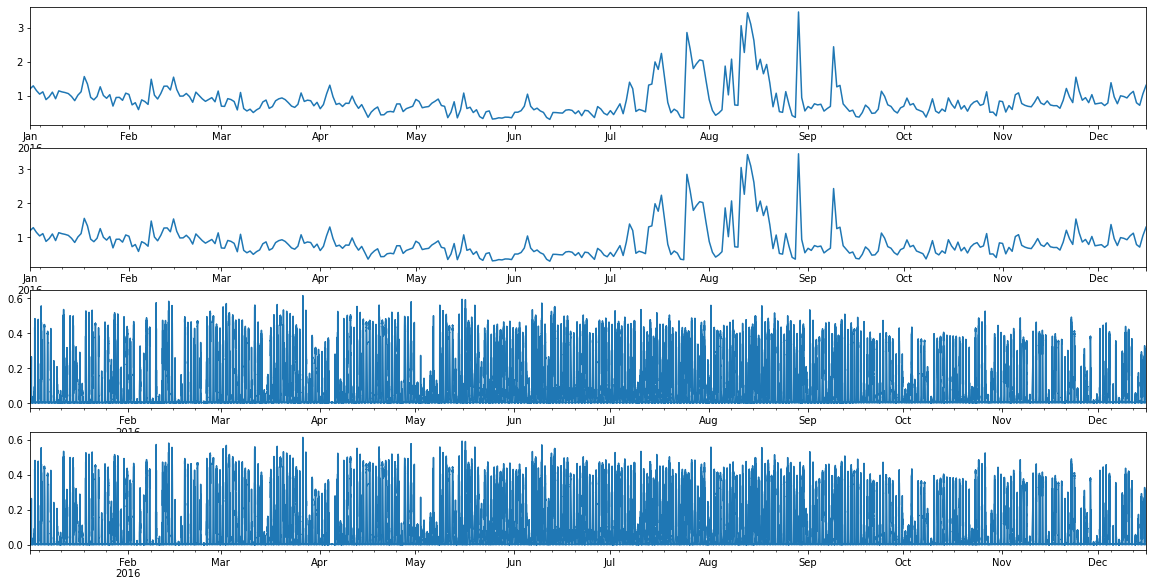

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=1)
data_df['use'].resample('D').mean().plot(ax=axes[0])
data_df['House overall'].resample('D').mean().plot(ax=axes[1])
data_df['gen'].plot(ax=axes[2],figsize=(20,10))
data_df['Solar'].plot(ax=axes[3],figsize=(20,10))

### Observation

* As from this plot it shows clearly that Use and House overall , Gen and Solar are the same values so considering these all features are not adding anything to this data so we can drop these columns.
* And from this plot we can clearly sees that in august there is an hike in enery usage compared to other months.

In [27]:
# So we can drop the colums which have similar data
data_df = data_df.drop(columns=['Solar','use'])
data_df.shape

(503910, 26)

In [28]:
data_df.head(2)

,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,summary_cat,icon_cat
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,0.004067,...,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000189,3,1
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,0.004067,...,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000189,3,1


In [29]:
data_df.to_csv('smart_home.csv')

## Split the data into Energy usage and Weather Information

In [30]:
#Creating two separate dataframe objects with energy and weather data respectively.
energy_data = data_df.filter(items=[ 'gen', 'House overall', 'Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room'])

weather_data = data_df.filter(items=['temperature',
                                      'humidity', 'visibility', 'apparentTemperature', 'pressure',
                                      'windSpeed', 'windBearing', 'dewPoint','summary_cat','icon_cat'])

In [31]:
energy_data.head()

,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.082617,0.442633,0.124150,0.006983,0.013083,0.000189,0.031350,0.001017,0.004067,0.001517
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.084533,0.444067,0.124000,0.006983,0.013117,0.000189,0.031500,0.001017,0.004067,0.001650
2016-01-01 05:02:00,0.003467,0.931817,0.000017,0.083017,0.446067,0.123533,0.006983,0.013083,0.000206,0.031517,0.001000,0.004067,0.001650
2016-01-01 05:03:00,0.003483,1.022050,0.000017,0.175417,0.446583,0.123133,0.006983,0.013000,0.000217,0.031500,0.001017,0.004067,0.001617
2016-01-01 05:04:00,0.003467,1.139400,0.000133,0.300917,0.446533,0.122850,0.006850,0.012783,0.000261,0.031500,0.001017,0.004067,0.001583


In [32]:
weather_data.head()

,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,dewPoint,summary_cat,icon_cat
2016-01-01 05:00:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4,3,1
2016-01-01 05:01:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4,3,1
2016-01-01 05:02:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4,3,1
2016-01-01 05:03:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4,3,1
2016-01-01 05:04:00,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,24.4,3,1


In [152]:
#Generating the data per day
energy_per_day = energy_data.resample('D').sum()
print("Shape of the data for every day in a year ",energy_per_day.shape)
energy_per_day.head()


Shape of the data for every day in a year  (351, 13)


,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2016-01-01,18.026200,1366.269517,59.517171,492.020017,64.668783,94.740300,29.093367,15.228367,3.873278,99.622950,30.537233,12.961117,77.071667
2016-01-02,76.051300,1851.521067,63.154404,683.761967,145.570317,74.851733,24.096767,19.246333,5.154752,185.776967,33.688133,12.480300,71.142950
2016-01-03,74.081433,1651.128133,105.508668,613.630533,196.064167,92.149033,32.989533,19.444933,6.364001,146.493667,31.955233,19.066117,42.779250
2016-01-04,108.525017,1500.686017,58.880760,605.129767,180.650867,71.016683,20.980700,19.249983,5.782085,47.837017,43.438883,20.249933,93.077467
2016-01-05,148.107500,1597.968867,72.973254,817.065250,133.360867,80.135633,30.792300,19.773067,4.918163,50.166067,19.157417,16.658967,44.483650


In [153]:
#Generating the data per week
energy_per_week = energy_data.resample('W').sum()
print("Shape of the data for every week in a year",energy_per_week.shape)
energy_per_week.head()

Shape of the data for every week in a year (51, 13)


,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2016-01-03,168.158933,4868.918717,228.180243,1789.412517,406.303267,261.741067,86.179667,53.919633,15.392031,431.893583,96.180600,44.507533,190.993867
2016-01-10,572.221083,10281.065683,322.905918,4309.503517,1060.328917,595.732950,180.574800,139.934433,34.102771,691.477933,161.061051,104.610683,475.712567
2016-01-17,446.667833,10365.530000,415.871596,4661.908917,1036.034600,538.311483,201.654983,138.471933,34.200943,467.751483,165.124600,90.808833,446.148850
2016-01-24,773.163450,11446.274100,328.069396,5650.391533,845.905650,501.469017,177.311500,136.808333,35.232993,871.137733,173.225900,88.269900,431.383199
2016-01-31,636.354167,9294.364817,318.545145,3861.230900,695.367683,539.017367,195.041583,135.907333,35.082345,851.749650,170.518450,101.335400,376.918150


In [154]:
#Generating the data per month
energy_per_month = energy_data.resample('M').sum() 
print("Shape of the data in every month in a year",energy_per_month.shape)
energy_per_month.head()

Shape of the data in every month in a year (12, 13)


,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2016-01-31,2596.565467,46256.153317,1613.572299,20272.447383,4043.940117,2436.271883,840.762533,605.041667,154.011083,3314.010383,766.110601,429.532350,1921.156633
2016-02-29,2704.221700,41558.035267,1399.090831,19171.333067,2850.642583,2225.080050,832.488483,572.159733,137.273728,2817.221550,741.079083,388.025434,1408.870900
2016-03-31,3795.807367,34026.880883,1506.501997,13046.526433,3511.736400,2393.101050,1268.479517,614.368167,134.469697,1791.915983,731.827333,426.910884,1585.980033
2016-04-30,3893.534950,29662.845900,1443.403725,9393.876000,3173.250717,2454.983017,1548.467600,627.425083,103.812260,2626.763767,658.356017,488.510350,1571.712033
2016-05-31,3670.712050,25550.843150,1180.812253,5957.877471,2768.990462,2648.659933,1561.469854,617.532683,99.109124,3321.740146,450.940233,406.917284,1179.055583


###  Outlier Detection 

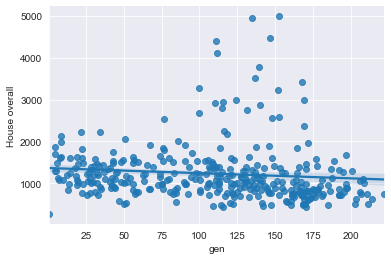

In [190]:
# Generated vs Used Energy per day 
sns.regplot(x="gen", y="House overall", data=energy_per_day)
sns.despine();

### Isolation Forest
* Unsupervised learning algorithm that identifies anomaly by isolating outliers in the data
* isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the max and min values of that feature
* Detects anomalies faster and require less memory compared to other algorithms.

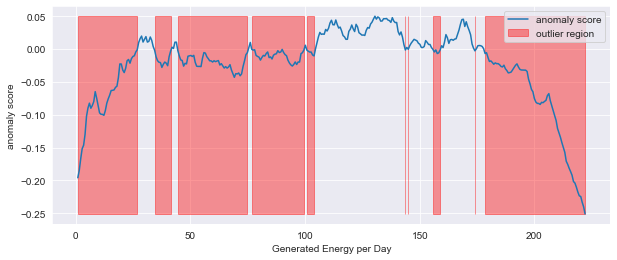

In [169]:
data = energy_per_day.filter(items=['gen'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['gen']])
df['anomaly']=isolation_forest.predict(df[['gen']])


# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Generated Energy per Day')
plt.show();

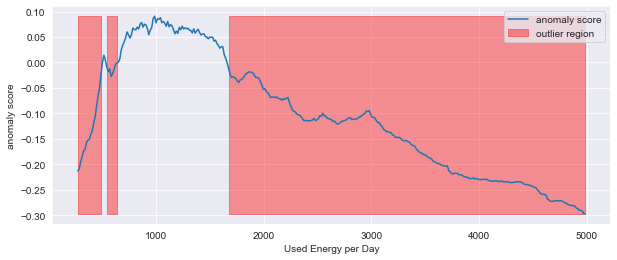

In [172]:
data = energy_per_day.filter(items=['House overall'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['House overall']])
df['anomaly']=isolation_forest.predict(df[['House overall']])



# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Day')
plt.show();

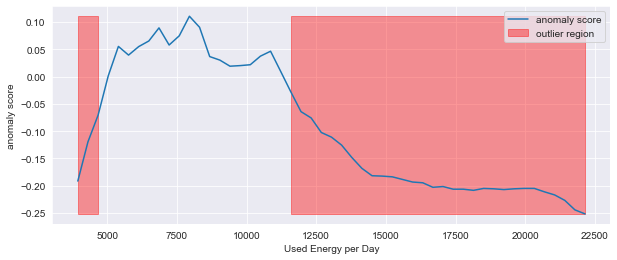

In [173]:
data = energy_per_week.filter(items=['House overall'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['House overall']])
df['anomaly']=isolation_forest.predict(df[['House overall']])



# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Week')
plt.show();

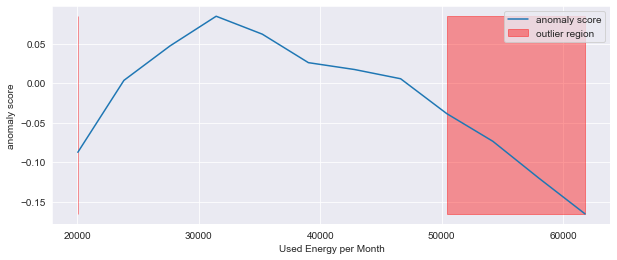

In [174]:
data = energy_per_month.filter(items=['House overall'])
df = data

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(data.values.reshape(-1, 1))
xx = np.linspace(data.min(), data.max(), len(data)).reshape(-1,1)

df['scores']=isolation_forest.decision_function(df[['House overall']])
df['anomaly']=isolation_forest.predict(df[['House overall']])



# Distribution of generated energy per day
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Used Energy per Month')
plt.show();


### Observation

* As we see the Anomaly score is -0.15 which is not a anomoly this may be the months we usage is compartively less so we don't need to conclude these points as anomalies.
* So there is no need to point these regions as outliers , as there is data that are captured in Peak power usages which follows some trends or seasonality. 


## 3. Data Visualization

Maximum energy used per day is  4985.831866670989


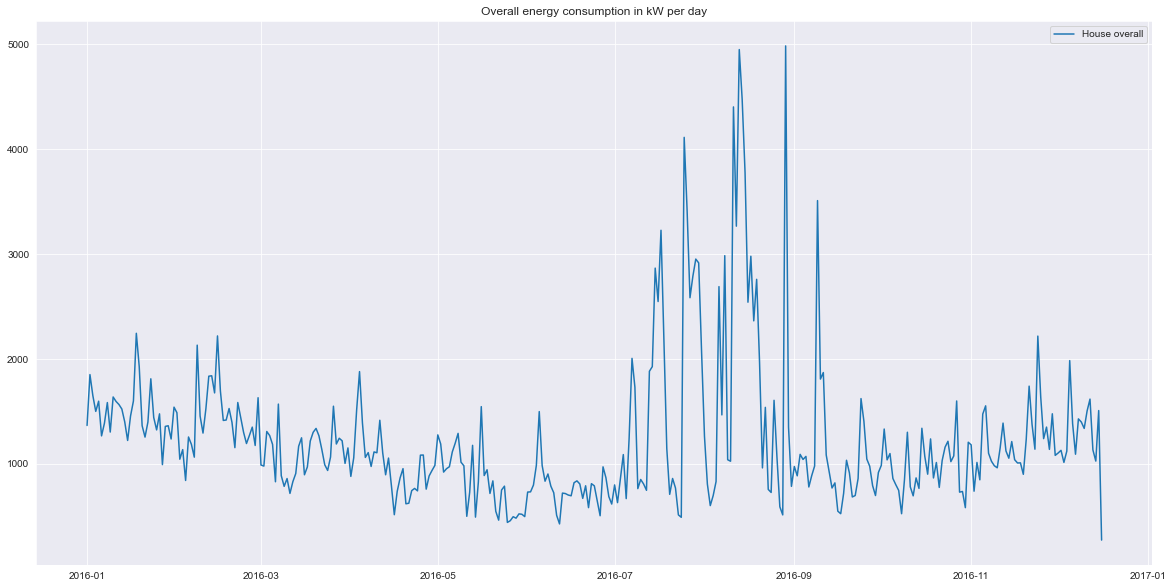

In [141]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per day")
#Plotting the energy consumption per day
sns.set_style("darkgrid")
sns.lineplot(data = energy_per_day.filter(items=['House overall']), dashes=True)
max_day=max(energy_per_day.filter(items=['House overall']).values)
print("Maximum energy used per day is ",max_day[0])

Maximum energy used per week is  22150.66556666


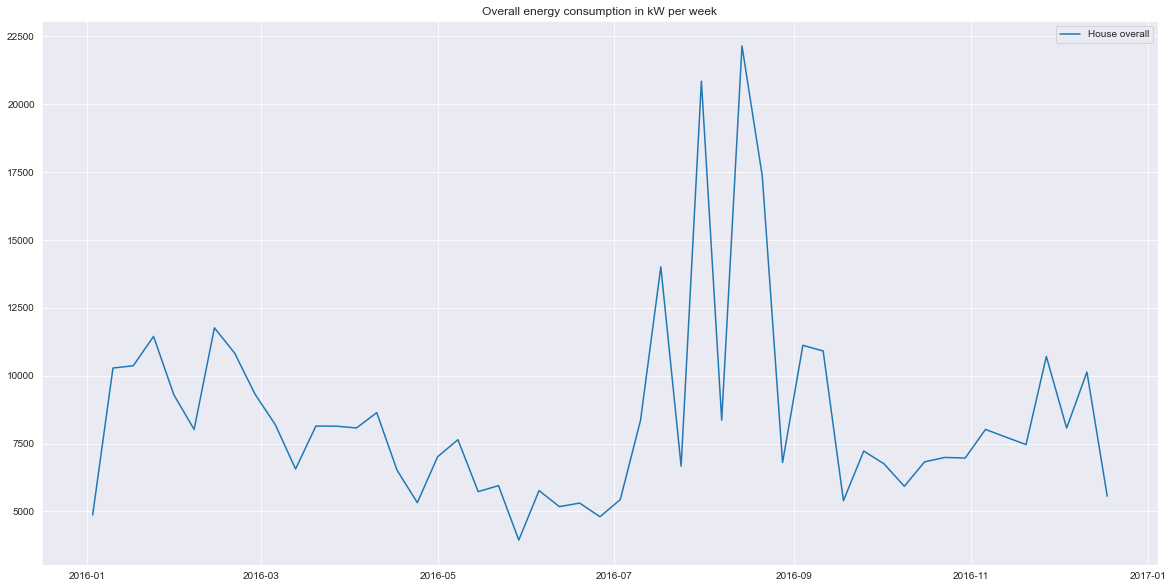

In [150]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Overall energy consumption in kW per week")
#Plotting the energy consumption per week
sns.set_style("darkgrid")
sns.lineplot(data = energy_per_week.filter(items=['House overall']), dashes=True)
max_week=max(energy_per_week.filter(items=['House overall']).values)
print("Maximum energy used per week is ",max_week[0])

Maximum energy used per month is  61786.433333318426


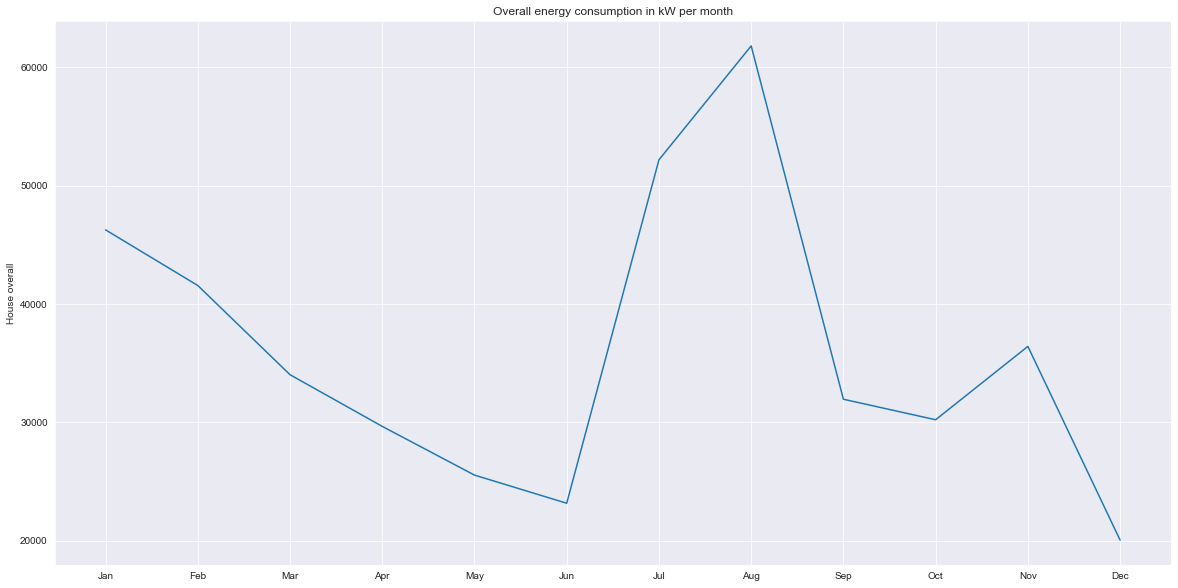

In [143]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

mon=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# Add title
plt.title("Overall energy consumption in kW per month")
#Plotting the energy consumption per month
sns.set_style("darkgrid")
g=sns.lineplot(x=mon,y="House overall",data = energy_per_month,dashes=True)

max_mon=max(energy_per_month.filter(items=['House overall']).values)
print("Maximum energy used per month is ",max_mon[0])

### Observations 

* The Maximum Enery used per day is 4985.83KW and this day is in the month of August.
* The Maximum Enery used per Week is 22150.66KW and this Week also in the month of August.
* The Maximum Enery used per month is 61786.43KW in August and the next maxium is in July.
* Minimum enery is used in the month of Dec and Jun 

####  As we know there are some Months like july and August where the energy needs are high we need to analyze futher by split the usages into each applainces and also room to find which one is using most of the energies during this months.

<AxesSubplot:title={'center':'Energy consumption in kW per day by individual room/appliance'}>

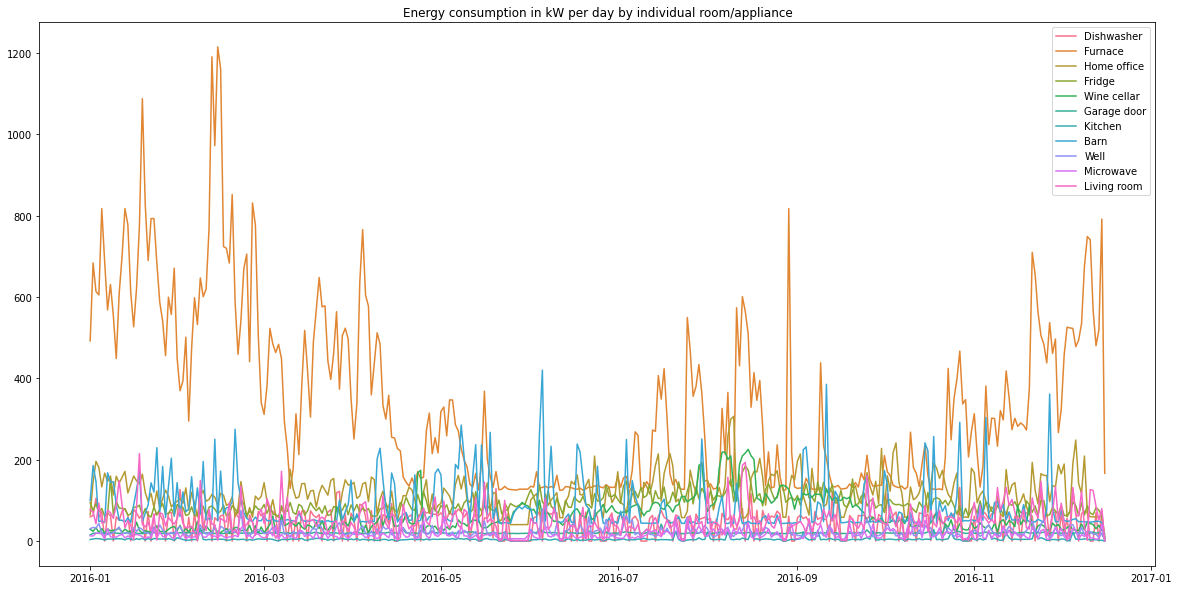

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per day by individual appliance")
sns.lineplot(data = energy_per_day.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']), dashes=False)

<AxesSubplot:title={'center':'Energy consumption in kW per month by individual room/appliance'}>

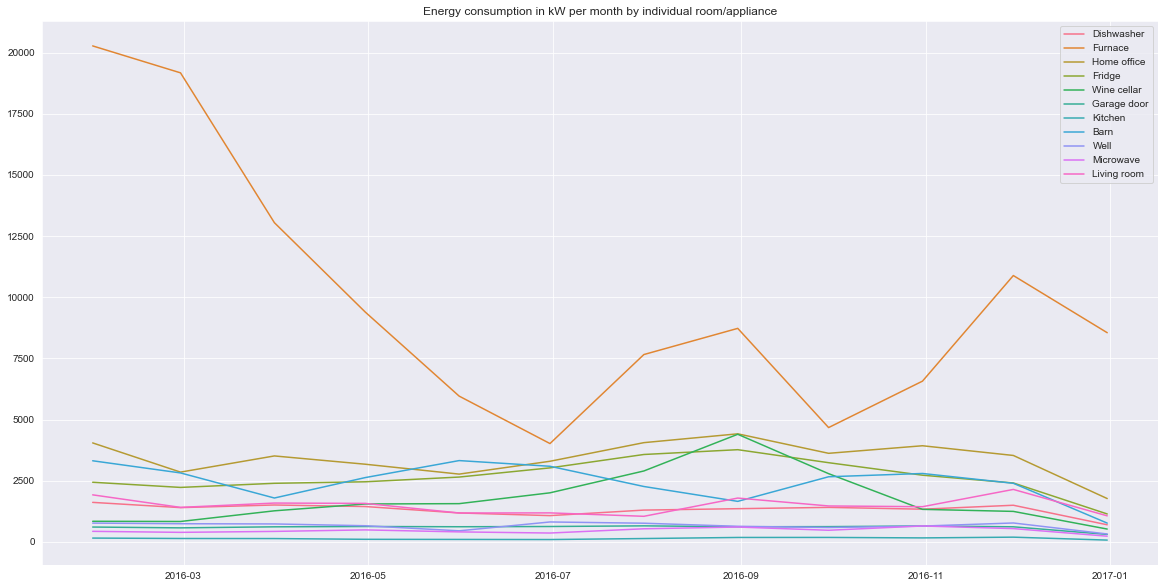

In [161]:
plt.figure(figsize=(20,10))
plt.title("Energy consumption in kW per month by individual appliance")
sns.lineplot(data= energy_per_month.filter(items=['Dishwasher',
                                     'Furnace', 'Home office', 'Fridge',
                                     'Wine cellar', 'Garage door', 'Kitchen', 'Barn', 'Well',
                                     'Microwave', 'Living room']),dashes=False)

### Observation

* In both energy usage per day and per month shows clearlt the furnace uses most of the energy throught the year.
* Fridge is the second most highest consumer of power so we need to analyze what is the percentage of energies used by each appliance in the home.

#### As the day plot look like overlapping of many appliances we will use monthwise data to provide better understanding

In [164]:

#Energy consumed by each room in the house

energy_per_room = energy_per_month.filter(items=['Home office',
                                     'Wine cellar', 'Kitchen','Barn',
                                      'Living room']) 



rooms_energy_consumption = energy_per_room.sum()
devices_energy_consumption = energy_per_device.sum()

print("Energy consumed in kW per day by each device in the house")
print(devices_energy_consumption)

Energy consumed in kW per day by each device in the house
Dishwasher      15806.409510
Furnace        118917.457954
Fridge          32026.710600
Garage door      7124.847316
Well             7882.163852
Microwave        5534.440218
dtype: float64


Text(0.5, 1.0, 'Energy consumption in kW by each device in the house')

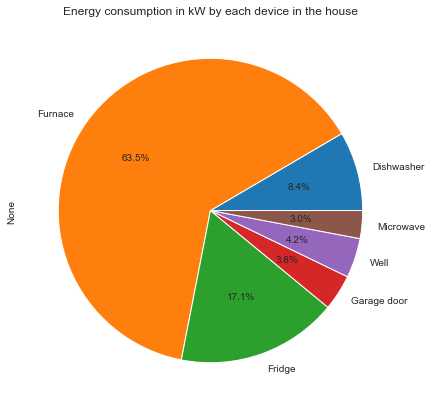

In [163]:
plot = devices_energy_consumption .plot(kind = "pie", figsize = (7,7),autopct='%1.1f%%')
plot.set_title("Energy consumption in kW by each device in the house")

### Observation 

* The usage of individual appliances  clearly shows that the furnace uses the <b>63.5%</b> of the energy.
* Only <b>36.5 %</b> energy is used by other applaiance compared to furnace.
* The lowest energy is consumed by the garage door and it consumes only <b>3.8%</b> of energy.

#### As we already know Furnace is the highest consumer of energy , we need some understanding about each rooms which has these applainces , so filter the data room wise to make some observations.

Energy consumed in kW per day by each room in the house
Home office    40961.277962
Wine cellar    21233.079320
Kitchen         1644.062194
Barn           29493.633696
Living room    17794.476716
dtype: float64


Text(0.5, 1.0, 'Energy consumption in kW by each room in the house')

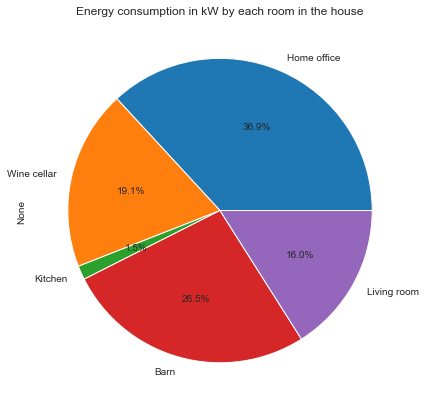

In [165]:
print("Energy consumed in kW per day by each room in the house")
# Energy consumed by each device in the house

energy_per_device = energy_per_month.filter(items=[ 'Dishwasher',
                                     'Furnace','Fridge',
                                     'Garage door', 'Well',
                                     'Microwave'])
print(rooms_energy_consumption)
plot = rooms_energy_consumption .plot(kind = "pie", figsize = (7,7),autopct='%1.1f%%')
plot.set_title("Energy consumption in kW by each room in the house")

### Observation 
* Home office uses <b>36.9 %</b> of the energy and this is the highest energy consumer in the house and Kitchen consumes only <b>1.5 % </b> of energy so its considered to be a lowest energy used room in the house .
* All other rooms uses remaining <b>61.6 %</b> of energy.

## 4. Correlation between the features

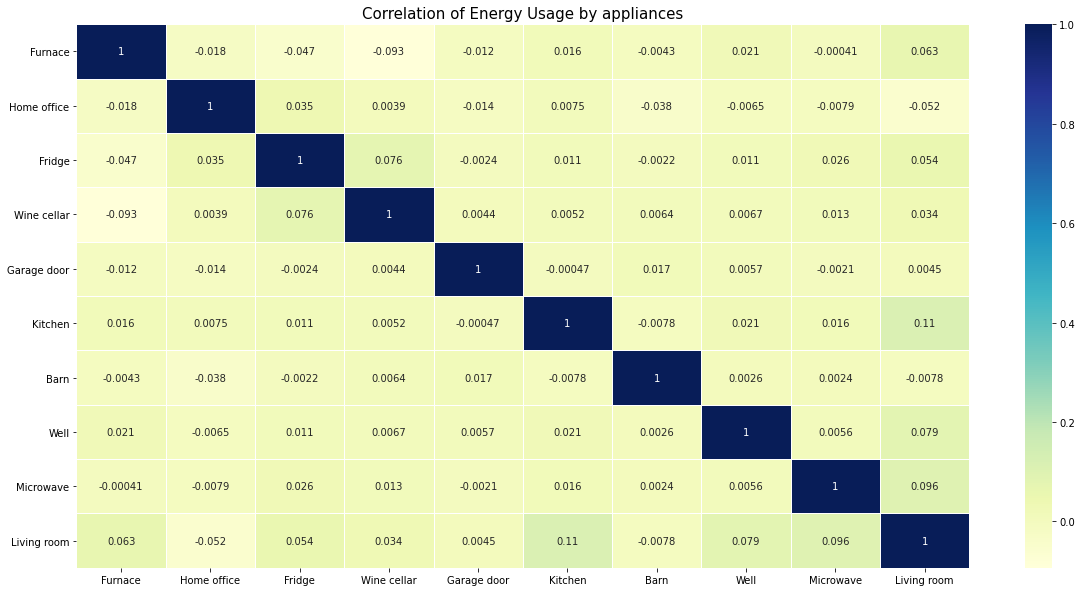

In [ ]:
#Correlation of energy usage by home appliances

energy_corr = energy_data.loc[:,'Furnace':].corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(energy_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation of Energy Usage by appliances", size=15)
plt.show()

### Observation 
* From the above plot it clearly shows there is no correlation between the features of <b> Appliances </b> as each feauture adding some value to the data and it does not depends on other indivudual features, so each of the feature is conditionally independent.

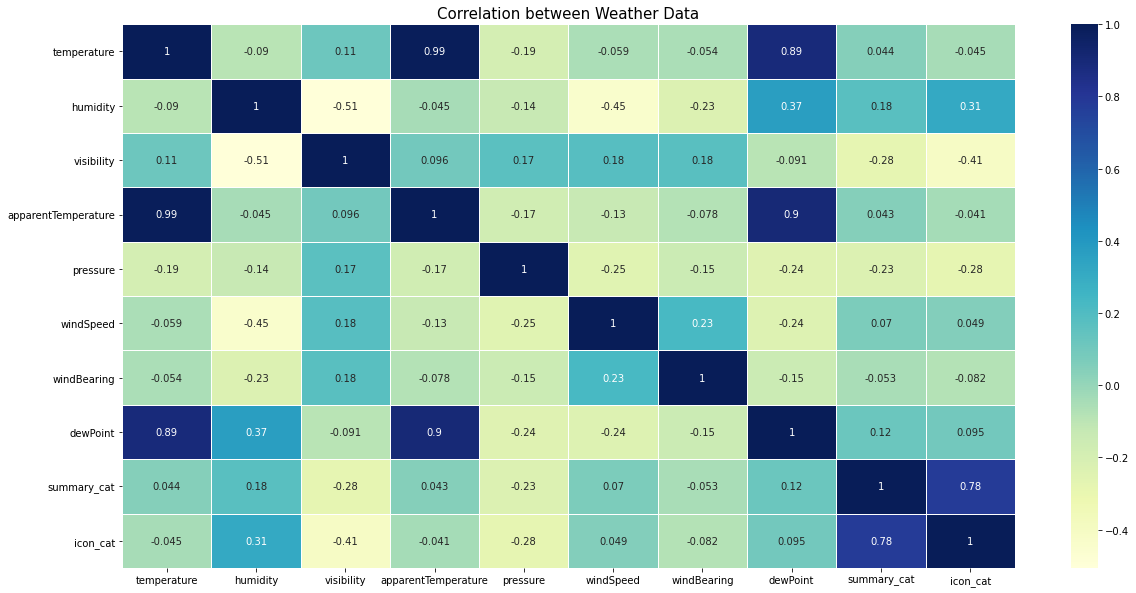

In [ ]:
#Correlation between weather data

weather_corr = weather_data.corr()
fig,ax = plt.subplots(figsize=(20, 10)) 
sns.heatmap(weather_corr, linewidths=0.5, annot=True, cmap="YlGnBu");
ax.set_title("Correlation between Weather Data", size=15)
plt.show()

### Observation 
* As we see in energy data there is very less corelation between the features but in <b>Weather data</b> there is a high Positive correlation bettween different features like Temperature and Apparent temperature , temperature and dewpoint , Summary and Icon Categories.
* icon and Summary catagories have some Positive corelation between the humidity and Negative corelation with temperature.


## 5. Time Series Analysis

In [ ]:
# define function to convert hour to time of day

def convertHourToPartOfDay(x):
    
    """ This function is used to convert particular hours into catagoreis so that we can analyze the data clearly"""
    if x in [22,23,0,1,2,3]:
        part = 'Night'
    elif x in range(4, 12):
        part = 'Morning'
    elif x in range(12, 17):
        part = 'Afternoon'
    elif x in range(17, 22):
        part = 'Evening'
    else:
        part = 'X'
    return part

In [ ]:
# define function to group by time of day

def groupByPartOfDay(column):
    """ This function groups the different categories of a day """
    partOfDayDf = energy_per_part_of_day.groupby('part').agg({column:['mean']})
    partOfDayDf.columns = [f"{i[0]}_{i[1]}" for i in partOfDayDf.columns]
    partOfDayDf['part_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in partOfDayDf.index]
    partOfDayDf.sort_values('part_num', inplace=True)
    partOfDayDf.drop('part_num', axis=1, inplace=True)
    return partOfDayDf

In [ ]:
# create column to indicate time of day in dataset

energy_per_part_of_day = energy_data.loc[:]
energy_per_part_of_day['hour'] = energy_per_part_of_day.index.map(lambda x: x.hour)
energy_per_part_of_day['part'] = energy_per_part_of_day['hour'].apply(convertHourToPartOfDay)

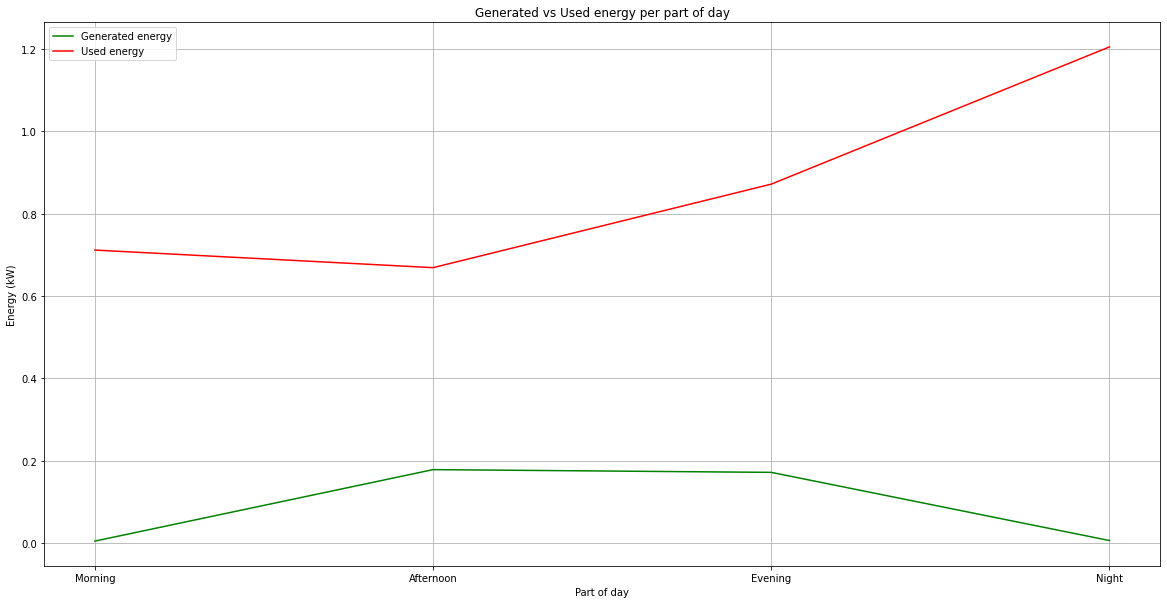

In [ ]:
# Plot generated vs used energy per part of day

plt.figure(figsize=(20,10))
plt.plot(groupByPartOfDay('gen'), 'g', label='Generated energy')
plt.plot(groupByPartOfDay('House overall'), 'r', label='Used energy')
plt.title('Generated vs Used energy per part of day')
plt.ylabel('Energy (kW)')
plt.xlabel('Part of day')
plt.legend()
plt.grid(True)
plt.show()

### Observation 
* This plot clearly shows that the highest energy usage is between the Evening and night time
* The Highest energy generated is during the Afternoon and Evening time because of Solar energy where the sun clearly creates more energy in these times.

In [ ]:
energy_per_day.head(2)

,gen,House overall,Dishwasher,Furnace,Home office,Fridge,Wine cellar,Garage door,Kitchen,Barn,Well,Microwave,Living room
2016-01-01,18.0262,1366.269517,59.517171,492.020017,64.668783,94.740300,29.093367,15.228367,3.873278,99.622950,30.537233,12.961117,77.071667
2016-01-02,76.0513,1851.521067,63.154404,683.761967,145.570317,74.851733,24.096767,19.246333,5.154752,185.776967,33.688133,12.480300,71.142950


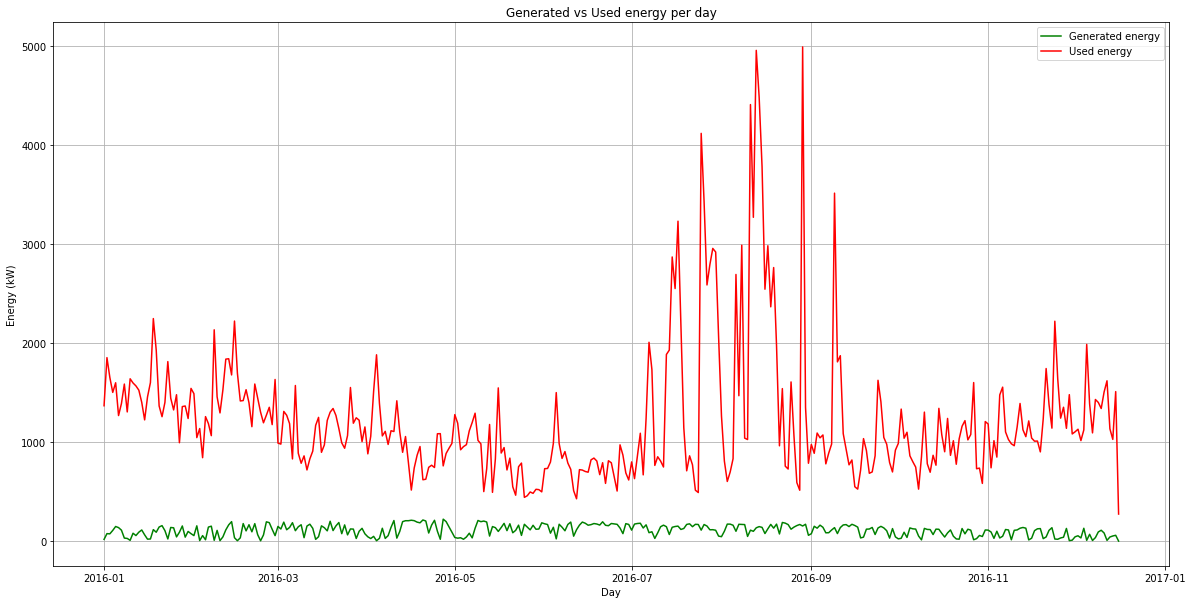

In [ ]:
# Plot generated vs used energy per day

plt.figure(figsize=(20,10))
plt.plot(energy_per_day.gen, 'g', label='Generated energy')
plt.plot(energy_per_day['House overall'], 'r', label='Used energy')
plt.title('Generated vs Used energy per day')
plt.ylabel('Energy (kW)')
plt.xlabel('Day')
plt.legend()
plt.grid(True)
plt.show()

### Observation 
* The generated enerygy for a complete year is very small when compared with the usage.
* In some months like July and August the usage is high ut the generated energy is still same so this is a important point to note for consideration to increase the energy generaion in future for these high consumption months.

###  4.1 Autocorrelation

*	Autocorrelation measures a set of current values against a set of past values to see if they correlate.
* We calculate the correlation for current time-series observations with observations of previous time steps called lags.
* For example, one might expect the energy usage at the 1st minute of the day to be more similar to the usage at 2nd minute rather than at a minute during mid-day.
* Data that has strong autocorrelation is not random, and provides high predictability.
* In this experiment, we use autocorrelation to determine the randomness and predictability of energy generation and usage.


Autocorrelation for 'use' =  0.6107009825029095


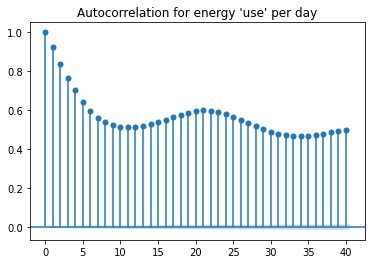

In [ ]:
#Plot ACF for energy 'use'

print("Autocorrelation for 'use' = ", energy_per_day['House overall'].autocorr())
fig = plot_acf(energy_data['House overall'], lags=40, title="Autocorrelation for energy 'use' per day")
plt.show()

### Observation 
* Data has positive autocorrelation. It provides good predictability with autocorrelation value = 0.61.

### 4.2 Seasonality
* The repeating short-term cycle in the series.
* The dataset used for this is the energy usage on a daily basis, and it showed somewhat of a cyclic behavior on a monthly basis.
* Therefore, I used seasonal decomposition with parameter freq=30.


<ipython-input-72-17a48c6bf969>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(energy_per_day['House overall'], model='additive', freq=30)


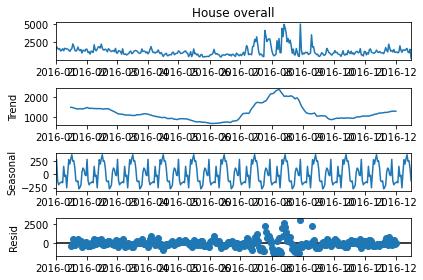

In [ ]:
result = seasonal_decompose(energy_per_day['House overall'], model='additive', freq=30)

result.plot()
plt.show()

### Observation 
* It is observed in the figure above that the per-day dataset displays a seasonal behavior at a frequency of 20

### 4.3 Stationarity

* Summary statistics calculated on the time series are consistent over time i.e. the mean or the variance. 
* To observe stationarity, split the dataset into two exact halves. 
* For each subset, calculate mean and variance. Compare the values. 
* If they differ, and the difference is statistically significant, the time-series is non-stationary and needs to be made stationary. 
* It was observed that the values differ but are essentially in the same ballpark.


In [ ]:
# split the dataset into two, and calculate mean and variance for both subsets

X = energy_data.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=0.113294, mean2=0.121690
variance1=0.092859, variance2=0.212700


### Dickey-Fuller Test - To check stationarity in the data

* The Augmented Dickey-Fuller test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used

* The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence

* <b> Null Hypothesis </b>  - The data is considered to be non- stationary is the p-value > 0.05
* <b> Alternate Hypothesis</b> - The data is considered to be stationary is the p-value < 0.05

In [191]:
# Reference - https://analyticsindiamag.com/complete-guide-to-dickey-fuller-test-in-time-series-analysis/

from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
X=data_df['House overall']


In [187]:
result = adfuller(X)

In [188]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -31.008462
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Observation
* The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary which follows some trend in the data.
